# Challenge 1

## Load dataset

In [129]:
import pandas as pd

dataset = pd.read_csv('../datasets/diamonds/diamonds.csv')

## Dataset Analysis

In [130]:
# Lets have a quick look at the data
dataset.describe()

# We can see some weird values in price, x, y, and z
# But lets analyze each numeric variable data first.

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


In [132]:
# Lets check for missing values
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Filter odd values

In [133]:
# First lets analyze the price
dataset[dataset['price'] < 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [134]:
# There are 10 rows with price below 0. This is not possible, and will affect our model so we need to remove them.
filter_dataset = dataset[dataset['price'] > 0]

In [135]:
# Now lets analyze the x, y, and z variables
filter_dataset[(filter_dataset['x'] <= 0) | (filter_dataset['y'] <= 0) | (filter_dataset['z'] <= 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


In [136]:
# There is only one row with x, y, or z equal to 0.
filter_dataset = filter_dataset[(filter_dataset['x'] > 0) | (filter_dataset['y'] > 0) | (filter_dataset['z'] > 0)]

### Functions

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

def display_histogram_boxplot(dataset, column):
    """
    Display a boxplot and histogram for a given column in a dataset.

    Parameters:
    dataset (pandas.DataFrame): The dataset containing the column.
    column (str): The name of the column to display.
    """

    f, (ax_box, ax_hist) = plt.subplots(2, 
                                        sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=dataset[column], ax=ax_box)
    sns.histplot(x=dataset[column], bins=12, kde=True, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [138]:
def find_outliers(dataset, column):
    """
    Find the outliers in a given column of a dataset.

    Parameters:
    dataset (pandas.DataFrame): The dataset containing the column.
    column (str): The name of the column to analyze.

    Returns:
    pandas.Series: A boolean series where True indicates an outlier.
    """

    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return (dataset[column] < lower_bound) | (dataset[column] > upper_bound)

### Continuous variables

#### Carat

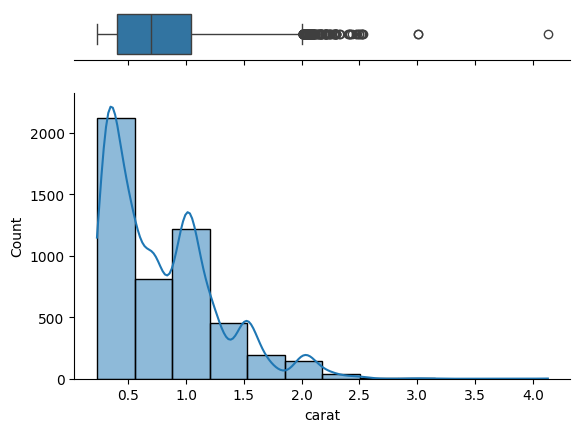

In [139]:
display_histogram_boxplot(dataset=filter_dataset, column='carat')

In [140]:
outliers_carat = find_outliers(dataset=filter_dataset, column='carat')

filter_dataset[outliers_carat]

,carat,cut,color,clarity,depth,table,price,x,y,z
8,2.01,Premium,G,SI2,61.2,57.2,18705,8.08,8.14,4.97
15,2.01,Premium,I,SI1,61.5,60.0,16499,8.12,8.01,4.96
18,2.50,Fair,G,I1,65.1,59.0,8711,8.55,8.39,5.53
63,2.01,Premium,H,VS2,62.8,58.0,13342,7.99,7.90,4.99
73,2.30,Premium,I,SI2,61.3,58.0,11051,8.53,8.46,5.21
...,...,...,...,...,...,...,...,...,...,...
4780,2.10,Premium,I,VS2,60.7,61.0,14394,8.28,8.27,5.02
4859,2.04,Good,I,SI1,57.7,64.0,11820,8.39,8.31,4.82
4956,2.01,Ideal,I,SI1,62.3,57.0,15680,8.04,8.08,5.02
4964,2.21,Premium,G,SI2,60.7,62.0,15970,8.48,8.42,5.13


In this case we have a 159 outliers according to the IQR method, but considering the information provide for this dataset we can assume that the outliers are not errors, so we will keep them (for now).

#### Depth

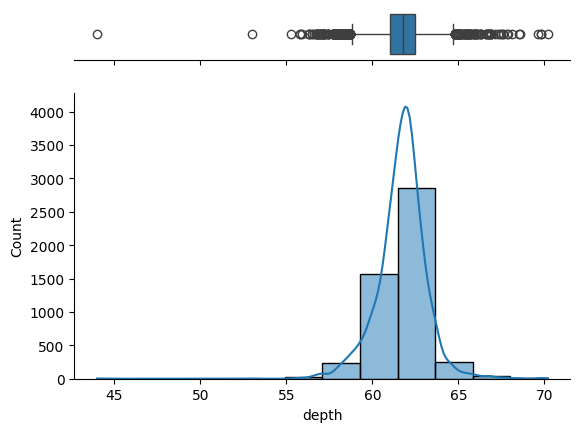

In [141]:
display_histogram_boxplot(dataset=filter_dataset, column='depth')

In [142]:
outliers_depth = find_outliers(dataset=filter_dataset, column='depth')

filter_dataset[outliers_depth]

,carat,cut,color,clarity,depth,table,price,x,y,z
18,2.50,Fair,G,I1,65.1,59.0,8711,8.55,8.39,5.53
45,1.02,Fair,E,VS2,66.6,57.0,5350,6.09,6.14,4.07
54,1.00,Very Good,I,SI1,58.5,61.0,4649,6.51,6.55,3.82
62,0.75,Fair,F,VS1,55.8,70.0,2859,6.09,5.98,3.37
68,0.30,Good,G,VS2,58.5,64.0,648,4.42,4.37,2.57
...,...,...,...,...,...,...,...,...,...,...
4892,1.02,Premium,E,SI2,58.7,59.0,4478,6.61,6.57,3.87
4931,0.43,Premium,F,SI2,58.3,62.0,813,4.97,4.91,2.88
4939,0.24,Very Good,F,VVS1,58.7,59.0,552,4.04,4.10,2.39
4962,1.69,Premium,F,VS2,58.7,59.0,16583,7.87,7.78,4.59


We can say the same this as the carat, we have 245 outliers, but we will keep them. Also we can say that the depth has a normal distribution just by looking at the histogram but more analysis is needed.

#### Table

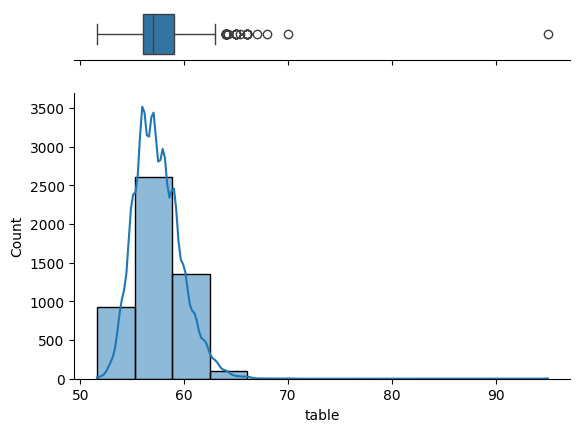

In [143]:
display_histogram_boxplot(dataset=filter_dataset, column='table')

In [144]:
outliers_table = find_outliers(dataset=filter_dataset, column='table')

filter_dataset[outliers_table].describe()

,carat,depth,table,price,x,y,z
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.930426,59.282979,65.438298,4361.276596,6.179362,6.142766,3.652766
std,0.457930,2.013791,4.574910,4020.591865,1.031336,1.016941,0.612453
min,0.300000,55.800000,64.000000,579.000000,4.420000,4.370000,2.500000
25%,0.650000,57.850000,64.000000,1986.000000,5.435000,5.490000,3.335000
50%,0.900000,58.900000,64.000000,2858.000000,6.130000,6.090000,3.740000
75%,1.110000,60.950000,65.200000,5219.000000,6.725000,6.695000,3.980000
max,2.040000,63.300000,95.000000,15851.000000,8.390000,8.310000,4.940000


#### Price

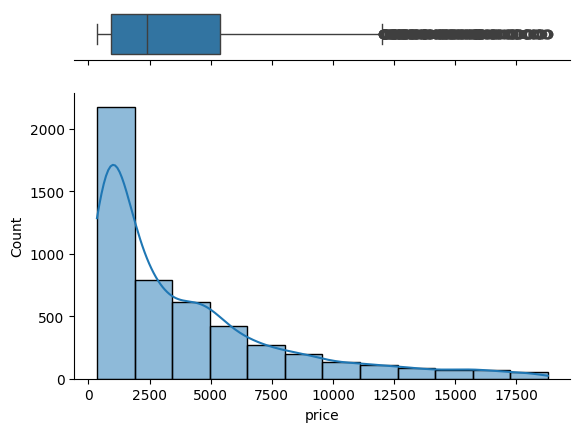

In [145]:
display_histogram_boxplot(dataset=filter_dataset, column='price')

In [146]:
outliers_price = find_outliers(dataset=filter_dataset, column='price')

filter_dataset[outliers_price].describe()

,carat,depth,table,price,x,y,z
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,1.830662,61.563407,58.108202,14921.536278,7.823628,7.808864,4.813628
std,0.357455,1.520696,3.011023,1937.471088,0.519380,0.513140,0.326681
min,1.010000,57.700000,51.600000,12030.000000,6.390000,6.350000,3.970000
25%,1.520000,60.800000,56.000000,13161.000000,7.420000,7.400000,4.570000
50%,2.000000,61.700000,58.000000,14817.000000,7.880000,7.880000,4.860000
75%,2.050000,62.400000,59.000000,16472.000000,8.200000,8.190000,5.040000
max,4.130000,67.600000,95.000000,18787.000000,10.000000,9.850000,6.430000


#### X of the diamond

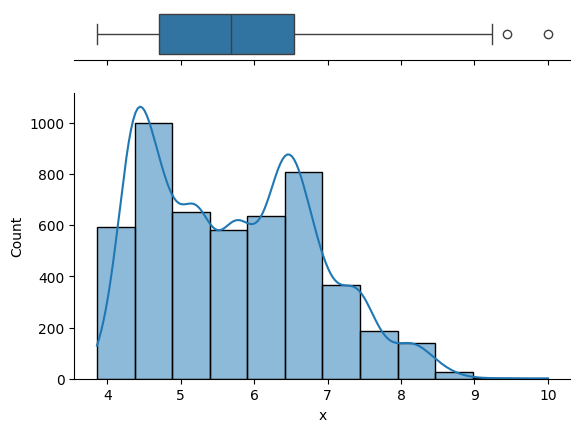

In [147]:
display_histogram_boxplot(dataset=filter_dataset, column='x')

In [148]:
outliers_x = find_outliers(dataset=filter_dataset, column='x')

filter_dataset[outliers_x].describe()

,carat,depth,table,price,x,y,z
count,2.00000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000
mean,3.57000,62.300000,59.50000,15774.500000,9.72000,9.610000,6.025000
std,0.79196,3.535534,2.12132,2198.394983,0.39598,0.339411,0.572756
min,3.01000,59.800000,58.00000,14220.000000,9.44000,9.370000,5.620000
25%,3.29000,61.050000,58.75000,14997.250000,9.58000,9.490000,5.822500
50%,3.57000,62.300000,59.50000,15774.500000,9.72000,9.610000,6.025000
75%,3.85000,63.550000,60.25000,16551.750000,9.86000,9.730000,6.227500
max,4.13000,64.800000,61.00000,17329.000000,10.00000,9.850000,6.430000


#### Y of the diamond

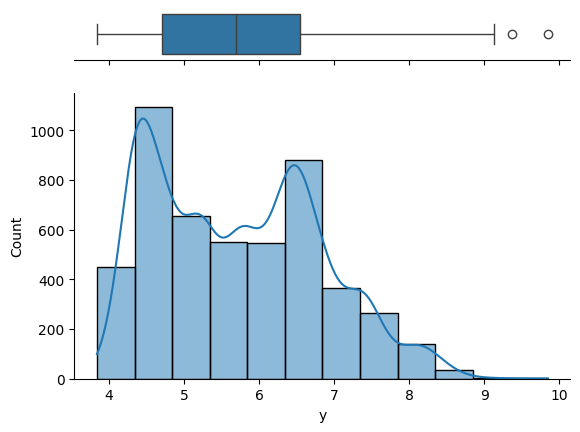

In [149]:
display_histogram_boxplot(dataset=filter_dataset, column='y')

In [150]:
outliers_y = find_outliers(dataset=filter_dataset, column='y')

filter_dataset[outliers_y].describe()

,carat,depth,table,price,x,y,z
count,2.00000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000
mean,3.57000,62.300000,59.50000,15774.500000,9.72000,9.610000,6.025000
std,0.79196,3.535534,2.12132,2198.394983,0.39598,0.339411,0.572756
min,3.01000,59.800000,58.00000,14220.000000,9.44000,9.370000,5.620000
25%,3.29000,61.050000,58.75000,14997.250000,9.58000,9.490000,5.822500
50%,3.57000,62.300000,59.50000,15774.500000,9.72000,9.610000,6.025000
75%,3.85000,63.550000,60.25000,16551.750000,9.86000,9.730000,6.227500
max,4.13000,64.800000,61.00000,17329.000000,10.00000,9.850000,6.430000


#### Z of the diamond

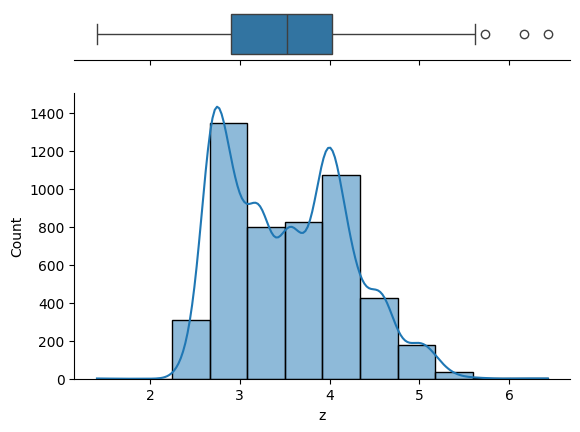

In [151]:
display_histogram_boxplot(dataset=filter_dataset, column='z')

In [152]:
outliers_z = find_outliers(dataset=filter_dataset, column='z')

filter_dataset[outliers_z].describe()

,carat,depth,table,price,x,y,z
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,3.050000,64.200000,57.666667,14272.000000,9.043333,8.940000,6.106667
std,1.060566,1.777639,2.886751,3866.895266,1.068660,1.018381,0.353034
min,2.010000,62.200000,56.000000,9925.000000,7.890000,7.840000,5.730000
25%,2.510000,63.500000,56.000000,12743.500000,8.565000,8.485000,5.945000
50%,3.010000,64.800000,56.000000,15562.000000,9.240000,9.130000,6.160000
75%,3.570000,65.200000,58.500000,16445.500000,9.620000,9.490000,6.295000
max,4.130000,65.600000,61.000000,17329.000000,10.000000,9.850000,6.430000


### Categorical variables

Now we should transform the categorical variables into numerical variables. For this we are going to use the information provided by the dataset. 

#### Cut

In [153]:
# Lets find all unique values for the categorical variable "cut"
filter_dataset['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [154]:
# In this case, we are going to assume that the "Fair" cut is the lowest quality, and "Premium" is the highest quality.
# And we are going to assign a value from 1 to 5 to each cut, where 1 is the lowest quality and 5 is the highest quality.

cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Ideal': 3,
    'Very Good': 4,
    'Premium': 5
}

filter_dataset['cut_category'] = filter_dataset['cut'].map(cut_mapping)

#### Color
We're going to follow the same steps as the cut variable.

In [155]:
# Lets find all unique values for the categorical variable "color"
filter_dataset['color'].unique()

array(['H', 'I', 'F', 'G', 'E', 'D', 'J'], dtype=object)

In [156]:
# For the color, we know that the scale goes from D (Colorless) to Z (Light Yellow). We are going to assign a value from 1 to 23 to each color, where 1 is the worst color (D) and 23 is the best color (Z).
color_grading_scale = list(map(chr, range(ord('D'), ord('Z')+1)))[::-1]

color_mapping = {k: v for v, k in enumerate(color_grading_scale, 1)}

filter_dataset['color_category'] = filter_dataset['color'].map(color_mapping)

In [157]:
filter_dataset

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_category,color_category
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11,3,19
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35,3,19
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18,5,18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50,3,21
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91,3,19
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72,5,20
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24,3,17
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70,5,21


#### Clarity

In [158]:
# Lets find all unique values for the categorical variable "color"
filter_dataset['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'IF', 'VVS2', 'VS1', 'I1', 'VVS1'],
      dtype=object)

In [159]:
# For the clarity, we don't get enough information from the dataset to know which is the best and worst clarity.
# But we can assume from the picture provided that the scale goes from IF (best) and II (worst).
# Upon further research, we can find that the scale goes from FL (Flawless) to I3 (Included 3).
# Ref: https://www.vrai.com/journal/post/diamond-inclusions

clarity_grading_scale = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'][::-1]

clarity_mapping = {k: v for v, k in enumerate(clarity_grading_scale, 1)}

filter_dataset['clarity_category'] = filter_dataset['clarity'].map(clarity_mapping)

### Derived variables
In this case we can use `z` to calculate `z_depth` and `table` to calculate `table_width`

In [160]:
filter_dataset['z_depth'] = filter_dataset['depth'] / (filter_dataset['z'] * 100)

In [161]:
filter_dataset['table_width'] = filter_dataset['table'] / (filter_dataset['x'] * 100)

In [162]:
filter_dataset

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_category,color_category,clarity_category,z_depth,table_width
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11,3,19,4,0.150852,0.083207
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35,3,19,5,0.143908,0.080460
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18,5,18,5,0.146172,0.084302
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50,3,21,5,0.135333,0.075370
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82,4,21,6,0.161518,0.092382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91,3,19,8,0.214089,0.114624
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72,5,20,8,0.225368,0.132584
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24,3,17,8,0.146462,0.082232
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70,5,21,6,0.232963,0.134571


We could further analyze the dataset, but for now we are going to stop here.

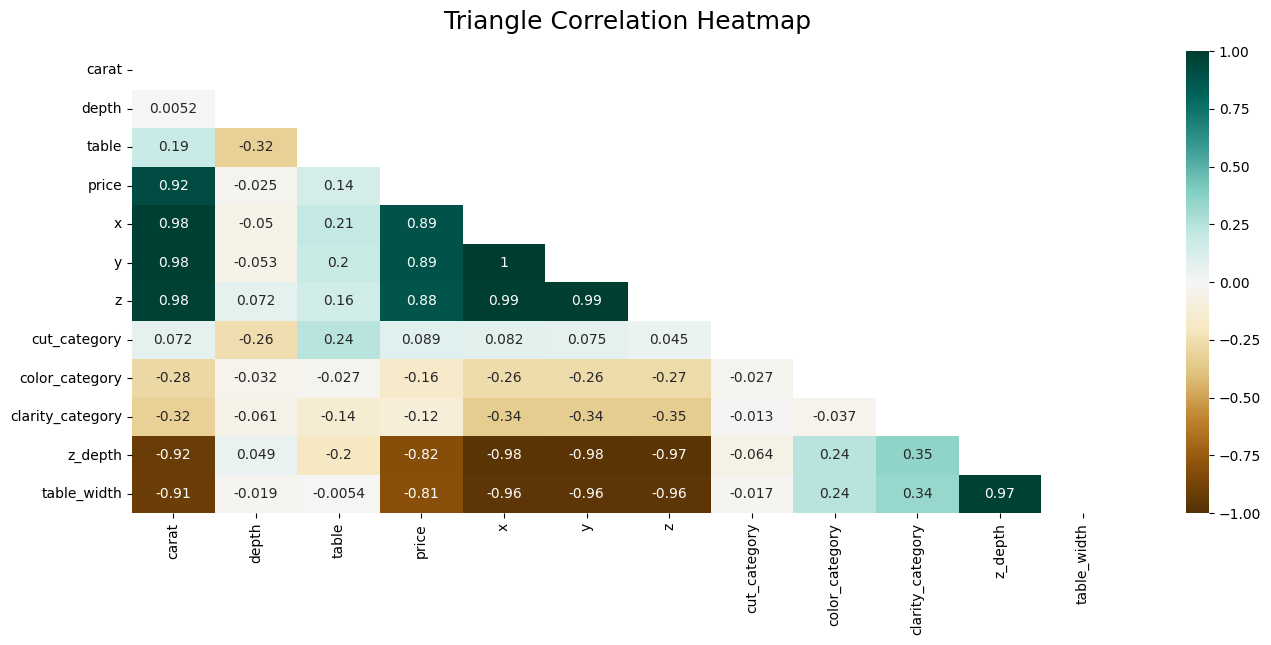

In [163]:
import numpy as np 

new_dataset = filter_dataset.drop(columns=['cut', 'color', 'clarity'])

plt.figure(figsize=(16, 6)) 

mask = np.triu(np.ones_like(new_dataset.corr(), dtype=bool))

heatmap = sns.heatmap(new_dataset.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

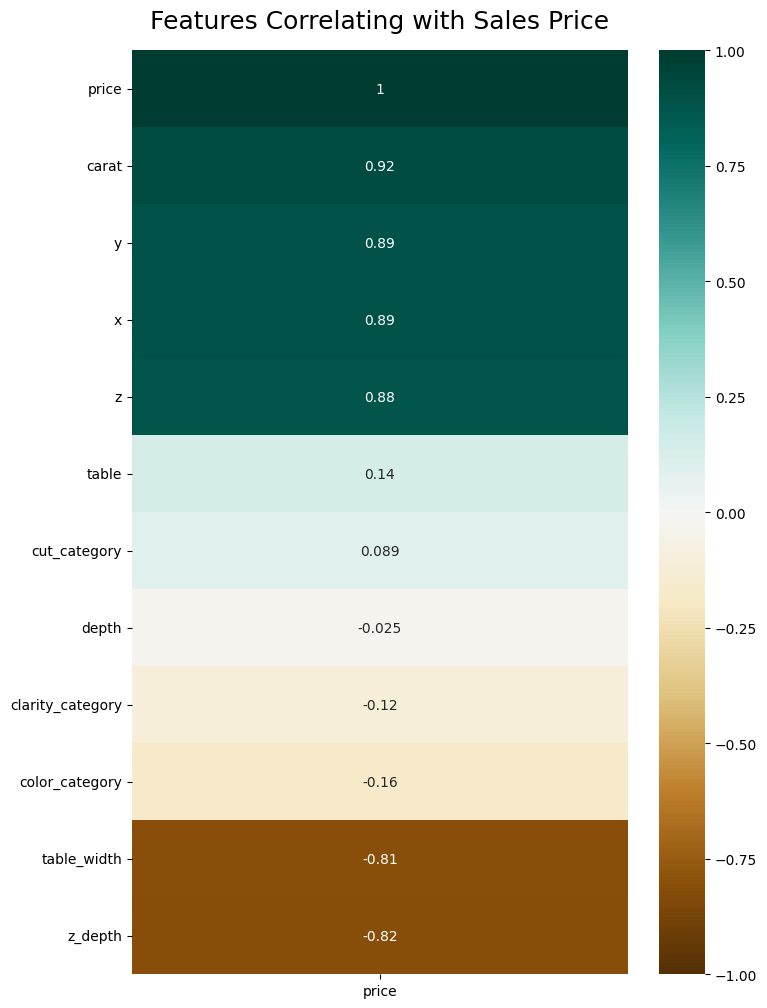

In [164]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(new_dataset.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

## Model Training

#### Dataset split

In [165]:
final_dataset = filter_dataset.drop(columns=['cut', 'color', 'clarity'])

X = final_dataset.drop(columns=['price'])
y = final_dataset['price']

In [166]:
from sklearn.model_selection import train_test_split

# Let's split the data into training and testing sets (30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Hyperparameter tuning

For this case we are going to perform a hyperparameter tuning using a `RandomizedSearchCV` with a 5-fold cross validation. There are many ways to perform hyperparameter tuning, such as `GridSearchCV`, `RandomizedSearchCV`, `Bayesian Optimization`, etc. In this case we are going to use `RandomizedSearchCV` because it is faster than `GridSearchCV` and it is more efficient than `Bayesian Optimization`. 

I like using `WandB` for hyperparameter tuning via Sweeps but in this case we are going to make it more simple.

##### Learning rate and number of estimators

In [167]:
import xgboost as xgb
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV

# Define the learning rate and estimators distributions
param_dist = {
    'learning_rate': stats.uniform(0.01, 0.3),
    'n_estimators':stats.randint(10, 500),
    'eval_metric': ['rmse'],
}

# Create XGBoost model
xgb_model = xgb.XGBRegressor(nthread=-1)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=5, 
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'eval_metric': 'rmse', 'learning_rate': 0.04595961020010484, 'n_estimators': 181}
Best score:  -448061.39743168914


##### Max depth and min child weight

In [168]:
param_dist = {
    'max_depth': range(3,10,2),
    'min_child_weight': range(1,10,2),
    'eval_metric': ['rmse'],
}

xgb_model = xgb.XGBRegressor(learning_rate=0.04595961020010484, n_estimators=181, nthread=-1)

random_search = RandomizedSearchCV(xgb_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=5, 
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

/home/bruno/miniconda3/envs/xtream/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best set of hyperparameters:  {'min_child_weight': 9, 'max_depth': 5, 'eval_metric': 'rmse'}
Best score:  -443488.3317762978


In [169]:
from sklearn.model_selection import GridSearchCV

param_dist = {
    'max_depth': [4, 5, 6],
    'min_child_weight': [8, 9, 10],
    'eval_metric': ['rmse'],
}

xgb_model = xgb.XGBRegressor(learning_rate=0.04595961020010484, n_estimators=181, nthread=-1)

# For this we are going to use GridSearch because we already have a selected range to search for the hyperparameters.
random_search = GridSearchCV(xgb_model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'eval_metric': 'rmse', 'max_depth': 5, 'min_child_weight': 10}
Best score:  -430807.272532591


##### Subsample and Colsample by tree

In [170]:
param_dist = {
    'subsample': [i/10.0 for i in range(3,11)],
    'colsample_bytree': [i/10.0 for i in range(3,11)],
    'eval_metric': ['rmse'],
}

xgb_model = xgb.XGBRegressor(learning_rate=0.04595961020010484, 
                             n_estimators=181, 
                             max_depth=5, 
                             min_child_weight=10, 
                             nthread=-1)

random_search = GridSearchCV(xgb_model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'colsample_bytree': 1.0, 'eval_metric': 'rmse', 'subsample': 0.9}
Best score:  -423699.38891684095


In [171]:
param_dist = {
    'colsample_bytree': [i/100.0 for i in range(90,105,5)],
    'subsample': [i/100.0 for i in range(85,100,5)],
    'eval_metric': ['rmse'],
}

xgb_model = xgb.XGBRegressor(learning_rate=0.04595961020010484, 
                             n_estimators=181, 
                             max_depth=5, 
                             min_child_weight=10, 
                             nthread=-1)

random_search = GridSearchCV(xgb_model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'colsample_bytree': 1.0, 'eval_metric': 'rmse', 'subsample': 0.9}
Best score:  -423699.38891684095


##### Gamma

In [172]:
param_dist = {
    'gamma': [i for i in range(0,10)],
    'eval_metric': ['rmse'],
}

xgb_model = xgb.XGBRegressor(learning_rate=0.04595961020010484, 
                             n_estimators=181, 
                             max_depth=5, 
                             min_child_weight=10, 
                             colsample_bytree=1.0,
                             subsample=0.9,
                             nthread=-1)

random_search = GridSearchCV(xgb_model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'eval_metric': 'rmse', 'gamma': 0}
Best score:  -423699.38891684095


##### Lambda

In [173]:
param_dist = {
    'reg_lambda': [1e-4, 1e-2, 0.1, 1, 10, 100],
    'eval_metric': ['rmse'],
}

xgb_model = xgb.XGBRegressor(learning_rate=0.04595961020010484, 
                             n_estimators=181, 
                             max_depth=5, 
                             min_child_weight=10, 
                             colsample_bytree=1.0,
                             subsample=0.9,
                             gamma=0,
                             nthread=-1)

random_search = GridSearchCV(xgb_model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'eval_metric': 'rmse', 'reg_lambda': 0.1}
Best score:  -417925.5934900508


In [174]:
param_dist = {
    'reg_lambda': [0.05, 0.075, 0.1, 0.125, 0.15, 0.2],
    'eval_metric': ['rmse'],
}

xgb_model = xgb.XGBRegressor(learning_rate=0.04595961020010484, 
                             n_estimators=181, 
                             max_depth=5, 
                             min_child_weight=10, 
                             colsample_bytree=1.0,
                             subsample=0.9,
                             gamma=0,
                             nthread=-1)

random_search = GridSearchCV(xgb_model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'eval_metric': 'rmse', 'reg_lambda': 0.1}
Best score:  -417925.5934900508


##### Final Parameters

We were able to find the best parameters for the model, now we are going to train the model with the best parameters.
Parameters:
- learning_rate: 0.04595961020010484
- n_estimators: 181
- max_depth: 5
- min_child_weight: 10
- subsample: 0.9
- colsample_bytree: 1.0
- gamma: 0
- reg_lambda: 0.1

#### Training final model and evaluation

In [175]:
xgb_model = xgb.XGBRegressor(learning_rate=0.04595961020010484, 
                             n_estimators=181, 
                             max_depth=5, 
                             min_child_weight=10, 
                             colsample_bytree=1.0,
                             subsample=0.9,
                             gamma=0,
                             reg_lambda=0.1,
                             nthread=-1,
                             eval_metric='rmse')

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04595961020010484,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=181, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)

In [176]:
from sklearn.metrics import mean_squared_error

y_pred_train = xgb_model.predict(X_train)

print("XGBoost score on training set: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xgb_model.predict(X_test)

print("XGBoost score on testing set: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))

XGBoost score on training set:  399.8579563783615
XGBoost score on testing set:  682.954956939037


## Saving final model

In [177]:
xgb_model.save_model("model/my_model.json")